## Análise exploratória dos dados do ENEM-2016

A análise dos dados está em publicada no meu [Medium](https://medium.com/@naiaracerqueira/an%C3%A1lise-explorat%C3%B3ria-de-dados-do-enem-d1a7cccf4489). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set(style='whitegrid')
#temas disponíveis: darkgrid, whitegrid, dark, white, and ticks

/home/naiara/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
plt.style.use('seaborn-colorblind')

#ver os estilos disponíveis, para escolher o seaborn-colorblind que é bonitinho 
plt.style.available

['seaborn-colorblind',
 'dark_background',
 'seaborn-white',
 'ggplot',
 'grayscale',
 'seaborn-deep',
 'tableau-colorblind10',
 'seaborn-darkgrid',
 'seaborn-dark-palette',
 'seaborn-paper',
 'seaborn-talk',
 'Solarize_Light2',
 'seaborn-whitegrid',
 'seaborn-muted',
 '_classic_test',
 'seaborn-dark',
 'seaborn-ticks',
 'classic',
 'seaborn-bright',
 'seaborn-notebook',
 'seaborn-pastel',
 'seaborn',
 'bmh',
 'fivethirtyeight',
 'seaborn-poster',
 'fast']

### Estudar e selecionar os dados

In [3]:
df = pd.read_csv('train.csv')
df.shape

(13730, 167)

In [4]:
#ver as colunas disponíveis
df.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [5]:
#selecionando apenas algumas colunas
enem = df[['SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','NU_NOTA_MT','NU_NOTA_CH','Q025',
         'Q006','Q002']]
print('meu dataset tem',enem.shape[0],'colunas e',enem.shape[1],'linhas')

meu dataset tem 13730 colunas e 9 linhas


In [6]:
enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NU_NOTA_MT,NU_NOTA_CH,Q025,Q006,Q002
0,RS,24,M,1,399.4,495.4,A,C,D
1,CE,17,F,3,459.8,544.1,A,B,A
2,CE,21,F,3,NaN,NaN,A,C,D
3,RJ,25,F,0,NaN,NaN,B,E,E
4,AM,28,M,2,NaN,NaN,A,C,D


In [7]:
#tabelinha com colunas, tipos dos dados em cada colunas e porcentagem de dados nulos por coluna
pd.DataFrame({'tipos':enem.dtypes, 'missing':enem.isna().sum()})

,tipos,missing
SG_UF_RESIDENCIA,object,0
NU_IDADE,int64,0
TP_SEXO,object,0
TP_COR_RACA,int64,0
NU_NOTA_MT,float64,3597
NU_NOTA_CH,float64,3389
Q025,object,0
Q006,object,0
Q002,object,0


### Tratando variáveis qualitativas

In [8]:
enem['TP_COR_RACA'] = enem['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'Branca', 2:'Preta', 3:'Parda',
                                               4:'Amarela', 5:'Indígena'})

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
#Possui internet em casa?
enem['Q025'] = enem['Q025'].map({'A':'Não', 'B':'Sim'})

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
#Escolaridade da mãe
enem['Q002'] = enem['Q002'].map({'A':'Nunca estudou', 'B':'Não completou EF', 'C':'Não completou EF',
                                'D':'Não completou EM', 'E':'Não completou ES', 'F':'Graduada',
                                'G':'Pós-graduada','H':'Não sabe'})

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
#Renda familiar (incluindo a do aluno)
enem['Q006'] = enem['Q006'].map({'A':'Nenhuma renda', 'B':'Até 1.320', 'C':'Até 1.320',
                                 'D':'Até 3.520', 'E':'Até 3.520', 'F':'Até 3.520', 'G':'Até 3.520',
                                 'H':'Até 10.560','I':'Até 10.560', 'J':'Até 10.560','K':'Até 10.560',
                                 'L':'Até 10.560','M':'Até 10.560','N':'Até 10.560',
                                 'O':'Mais de 10.560','P':'Mais de 10.560','Q':'Mais de 10.560'})

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Gráficos iniciais

In [12]:
#porcentagem de cada sexo na amostra
enem['TP_SEXO'].value_counts()/enem.shape[0]*100

F    61.84268
M    38.15732
Name: TP_SEXO, dtype: float64

In [13]:
enem['TP_COR_RACA'].value_counts()/enem.shape[0]*100

Parda       48.747269
Branca      33.423161
Preta       13.066278
Amarela      2.272396
NA           1.755280
Indígena     0.735615
Name: TP_COR_RACA, dtype: float64

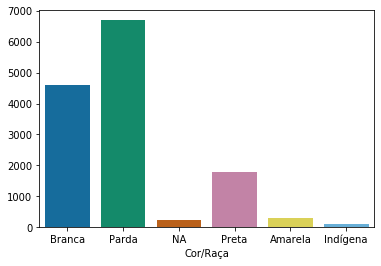

In [14]:
sns.countplot(enem['TP_COR_RACA'])
plt.xlabel('Cor/Raça')
plt.ylabel("")
plt.show()

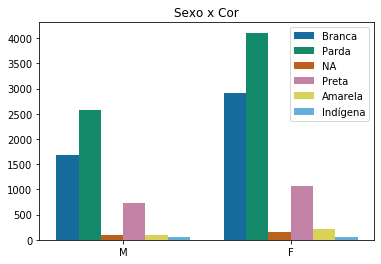

In [15]:
sns.countplot(enem['TP_SEXO'],hue=enem['TP_COR_RACA'], dodge=True)
plt.title('Sexo x Cor')
plt.xlabel('')
plt.ylabel("")
plt.legend(loc='best')
plt.show()

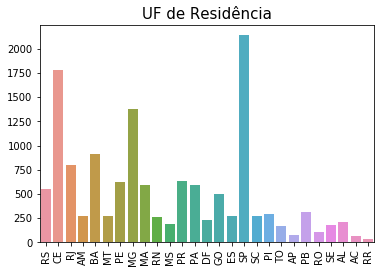

In [16]:
sns.countplot(enem['SG_UF_RESIDENCIA'], orient='h')
plt.title('UF de Residência', size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [17]:
#Possui internet em casa?
enem['Q025'].value_counts()/enem.shape[0]*100

Sim    56.919155
Não    43.080845
Name: Q025, dtype: float64

In [18]:
#Escolaridade da mãe
enem['Q002'].value_counts()/enem.shape[0]*100

Não completou EF    34.879825
Não completou ES    28.281136
Não completou EM    15.171158
Graduada             7.021122
Não sabe             5.243991
Pós-graduada         4.719592
Nunca estudou        4.683176
Name: Q002, dtype: float64

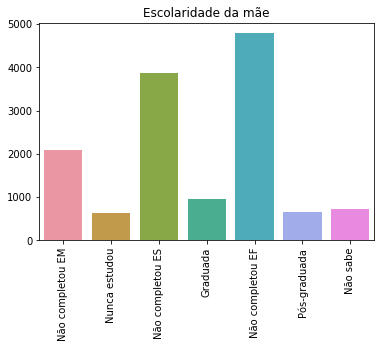

In [19]:
sns.countplot(enem['Q002'])
plt.title('Escolaridade da mãe')
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [20]:
#Renda da familia, incluindo a do aluno
enem['Q006'].value_counts()/enem.shape[0]*100

Até 1.320         57.574654
Até 3.520         28.936635
Até 10.560         8.455936
Nenhuma renda      3.576111
Mais de 10.560     1.456664
Name: Q006, dtype: float64

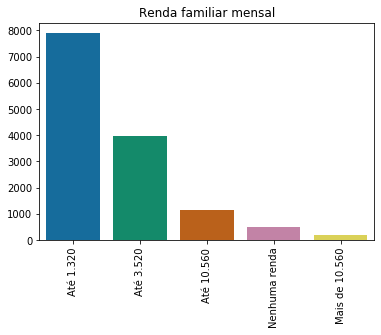

In [21]:
sns.countplot(enem['Q006'])
plt.title('Renda familiar mensal')
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

### Cruzando com as notas de matemática

In [22]:
enem.describe()

,NU_IDADE,NU_NOTA_MT,NU_NOTA_CH
count,13730.000000,10133.000000,10341.000000
mean,21.593809,482.497928,529.661087
std,7.043654,99.826323,73.726344
min,13.000000,0.000000,0.000000
25%,17.000000,408.900000,480.400000
50%,19.000000,461.200000,532.000000
75%,23.000000,537.600000,581.200000
max,67.000000,952.000000,807.000000


/home/naiara/snap/jupyter/common/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/naiara/snap/jupyter/common/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


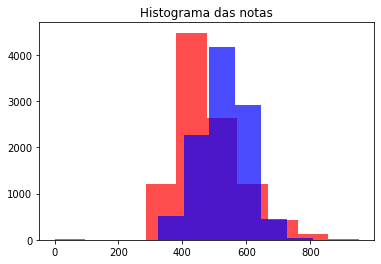

In [23]:
plt.hist(enem['NU_NOTA_MT'], alpha=0.7, color='red')
plt.hist(enem['NU_NOTA_CH'], alpha=0.7, color='blue')
plt.title('Histograma das notas')
plt.show()

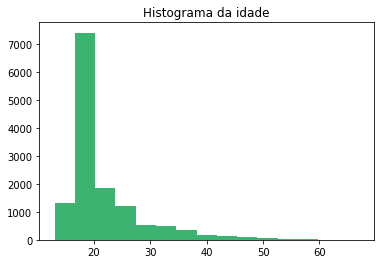

In [24]:
plt.hist(enem['NU_IDADE'],bins=15, histtype='bar', color='#3CB371')
plt.title('Histograma da idade')
plt.show()

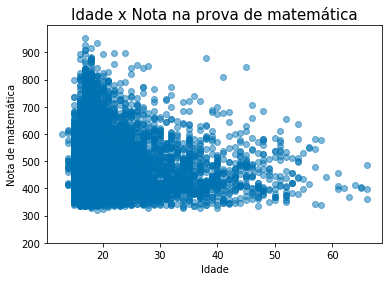

In [25]:
plt.scatter(enem['NU_IDADE'], enem['NU_NOTA_MT'], alpha=0.5)
plt.title("Idade x Nota na prova de matemática", size=15)
plt.xlabel("Idade")
plt.ylabel("Nota de matemática")
plt.ylim(200) #ignorando as notas = 0
plt.show()

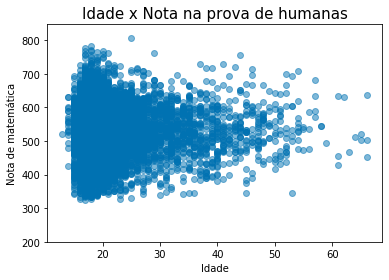

In [26]:
plt.scatter(enem['NU_IDADE'], enem['NU_NOTA_CH'], alpha=0.5)
plt.title("Idade x Nota na prova de humanas", size=15)
plt.xlabel("Idade")
plt.ylabel("Nota de matemática")
plt.ylim(200) #ignorando as notas = 0
plt.show()

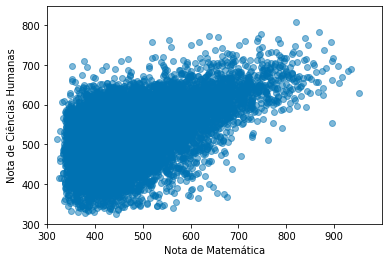

In [27]:
plt.scatter(enem['NU_NOTA_MT'], enem['NU_NOTA_CH'], alpha=0.5)
plt.xlim(300) #removendo as notas =0
plt.ylim(300) #removendo as notas =0
plt.xlabel("Nota de Matemática")
plt.ylabel("Nota de Ciências Humanas")
plt.show()

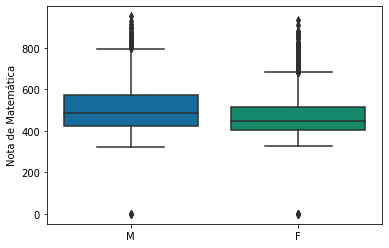

In [28]:
sns.boxplot(x=enem['TP_SEXO'], y=enem['NU_NOTA_MT'])
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()

#fazer teste estatistico pra ver se tem diferença significativa entre os sexos

In [29]:
from scipy import stats
from statsmodels.stats import diagnostic

In [30]:
sexo = enem[['TP_SEXO', 'NU_NOTA_MT']]
sexo_f = sexo.query('TP_SEXO == "F"').drop('TP_SEXO',axis=1).dropna()
sexo_m = sexo.query('TP_SEXO == "M"').drop('TP_SEXO',axis=1).dropna()
print(sexo_f.shape[0])
print(sexo_m.shape[0])

6261
3872


In [31]:
# teste de normalidade: Shapiro-Wilk "p-value may not be accurate for N > 5000."
# teste de normalidade: Lilliefors Test: FALHOU! 
# mas eu imaginava isso pelos gráficos e diferença entre media e mediana

print('sexo_f:',diagnostic.lilliefors(sexo_f))
print('sexo_m:',diagnostic.lilliefors(sexo_m))

sexo_f: (0.99999987162784, 0.0)
sexo_m: (0.9999983086378383, 0.0)


In [32]:
# Teste U de Mann–Whitney: são estatisticamente diferentes!
stats.mannwhitneyu(sexo_f, sexo_m, alternative='two-sided')

MannwhitneyuResult(statistic=9597671.5, pvalue=1.2710802245123467e-69)

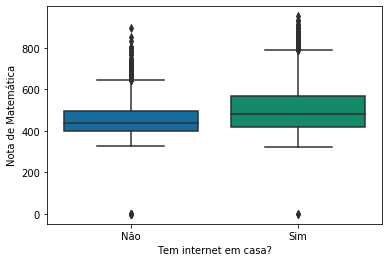

In [33]:
sns.boxplot(x=enem['Q025'], y=enem['NU_NOTA_MT'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota de Matemática")
plt.show()

In [34]:
internet = enem[['Q025', 'NU_NOTA_MT']]
internet_n = internet.query('Q025 == "Não"').drop('Q025',axis=1).dropna()
internet_s = internet.query('Q025 == "Sim"').drop('Q025',axis=1).dropna()
print(internet_n.shape[0])
print(internet_s.shape[0])

4247
5886


In [35]:
# teste de normalidade: FALHOU!
print('internet_n:',diagnostic.lilliefors(internet_n))
print('internet_s:',diagnostic.lilliefors(internet_s))

internet_n: (0.9999999943449176, 0.0)
internet_s: (0.9999985910697969, 0.0)


In [36]:
# Teste U de Mann–Whitney: são estatisticamente diferentes!
stats.mannwhitneyu(internet_n, internet_s, alternative='two-sided')

MannwhitneyuResult(statistic=9115766.0, pvalue=6.334258553997286e-120)

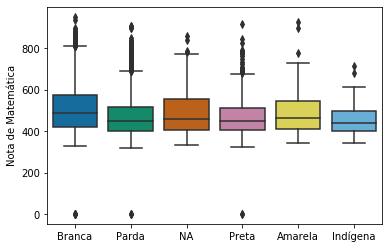

In [37]:
sns.boxplot(x=enem['TP_COR_RACA'], y=enem['NU_NOTA_MT'])
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()

In [38]:
raca = enem[['TP_COR_RACA', 'NU_NOTA_MT']]
raca_b = raca.query('TP_COR_RACA == "Branca"').drop('TP_COR_RACA',axis=1).dropna()
raca_pa = raca.query('TP_COR_RACA == "Parda"').drop('TP_COR_RACA',axis=1).dropna()
raca_pr = raca.query('TP_COR_RACA == "Preta"').drop('TP_COR_RACA',axis=1).dropna()
raca_a = raca.query('TP_COR_RACA == "Amarela"').drop('TP_COR_RACA',axis=1).dropna()
raca_i = raca.query('TP_COR_RACA == "Indígena"').drop('TP_COR_RACA',axis=1).dropna()

print(raca_b.shape[0])
print(raca_pa.shape[0])
print(raca_pr.shape[0])
print(raca_a.shape[0])
print(raca_i.shape[0]) 

3467
4907
1299
228
64


In [39]:
# Agora eu já entro em comparações múltiplas pq não tenho mais só duas amostras pra comparar
# O Teste de Kruskal-Wallis é um teste não paramétrico para comparações de múltiplas amostras
# Ele é seguido do Dunn, que avalia as amostras com diferenças significativas de duas em duas 
# Ainda não apliquei o Dunn pois não consegui.

stats.kruskal(raca_b,raca_pa,raca_pr,raca_a,raca_i)

KruskalResult(statistic=284.7092670628257, pvalue=2.1507004144333315e-60)

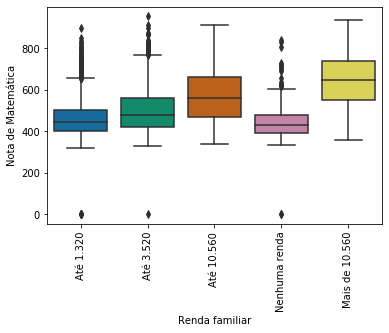

In [40]:
sns.boxplot(x=enem['Q006'], y=enem['NU_NOTA_MT'])
plt.xticks(rotation=90)
plt.xlabel("Renda familiar")
plt.ylabel("Nota de Matemática")
plt.show()

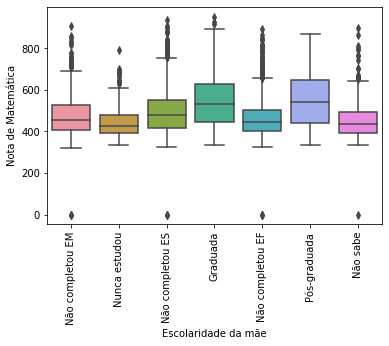

In [41]:
sns.boxplot(x=enem['Q002'], y=enem['NU_NOTA_MT'])
plt.xticks(rotation=90)
plt.xlabel("Escolaridade da mãe")
plt.ylabel("Nota de Matemática")
plt.show()

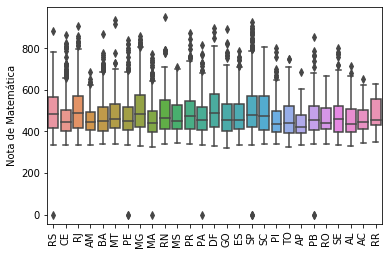

In [42]:
sns.boxplot(x=enem['SG_UF_RESIDENCIA'], y=enem['NU_NOTA_MT'])
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()